In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as rq
import numpy as np
from io import BytesIO
from PIL import Image
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
def scrap_img_hashtags(nb_max = 50):

    options = webdriver.ChromeOptions()
    options.headless = True  # Exécution sans interface graphique

    # Initialiser le navigateur Chrome sans spécifier executable_path
    driver = webdriver.Chrome(options=options)

    # Accéder à la page de connexion de Pixelfed
    login_url = 'https://pixelfed.social/login'
    driver.get(login_url)

    # Remplir le formulaire de connexion
    username = 'sosorezka@gmail.com'  # Remplacez par votre nom d'utilisateur
    password = 'sofia2001'  # Remplacez par votre mot de passe

    username_field = driver.find_element(By.NAME, 'email')
    password_field = driver.find_element(By.NAME, 'password')

    username_field.send_keys(username)
    password_field.send_keys(password)

    # Soumettre le formulaire de connexion
    login_button = driver.find_element(By.CSS_SELECTOR, "button.btn.btn-primary.btn-block.btn-lg.font-weight-bold")
    ActionChains(driver).move_to_element(login_button).click().perform()

    driver.implicitly_wait(10)

    # Trouver l'élément <a> par son attribut href
    global_timeline_link = driver.find_element(By.CSS_SELECTOR, 'a[href="/i/web/timeline/global"]')

    # Obtenir l'URL de la page à partir de l'attribut href
    page_url = global_timeline_link.get_attribute("href")

    # Ouvrir un nouvel onglet ou une nouvelle fenêtre pour accéder à l'URL
    driver.execute_script(f"window.open('{page_url}', '_blank');")

    # Passer à l'onglet ou la fenêtre nouvellement ouvert
    driver.switch_to.window(driver.window_handles[-1])

    is_last_page = False
    dico_img = {}
    #liste_img = []
    #liste_hashtags = []
    while not is_last_page and len(dico_img)<nb_max :
        print(len(dico_img))
        # Trouver les éléments représentant les publications
        posts = driver.find_elements(By.CSS_SELECTOR, "div.timeline-status-component-content")
        for post in posts:
            # Trouver les images
            try :
                image = post.find_element(By.CSS_SELECTOR, "img")
                image_url = image.get_attribute('src')

                # Trouver les textes de la publication
                post_text = post.text

                # Expression régulière pour extraire tous les hashtags
                hashtags = re.findall(r'#\w+', post_text)

                if len(hashtags)>0 :
                    dico_img[image_url] = hashtags
                    #liste_img.append(image_url)
                    #liste_hashtags.append(hashtags)
                    print("Image URL: ", image_url)
                    print("Hashtags: ", hashtags)
                    print("")
            except :
                print("pb")

        try:
            print("try")
            load_more_button = driver.find_element(By.CSS_SELECTOR, "button.btn.btn-primary.rounded-pill.font-weight-bold")
            print("here")
            ActionChains(driver).move_to_element(load_more_button).click().perform()
            print("load")
        except:
            is_last_page = True
            print('Last page')

    return dico_img


In [13]:
dico = scrap_img_hashtags(20)

0
Image URL:  https://storage.gra.cloud.ovh.net/v1/AUTH_91eb37814936490c95da7b85993cc2ff/bildungsocial/media_attachments/files/111/246/302/664/197/515/original/e3a9960db1397017.png
Hashtags:  ['#Konfi', '#SchuleRU', '#arsnova', '#AudienceResponseSystem', '#ClassQuiz', '#kahootHier']

Image URL:  https://media.universeodon.com/media_attachments/files/111/246/295/592/544/565/original/44ecccefafe0210f.jpg
Hashtags:  ['#hiking', '#Nature', '#desert', '#geology', '#travel', '#TravelPhotography', '#photo', '#wilderness']

try
here
load
2
Image URL:  https://storage.gra.cloud.ovh.net/v1/AUTH_91eb37814936490c95da7b85993cc2ff/bildungsocial/media_attachments/files/111/246/302/664/197/515/original/e3a9960db1397017.png
Hashtags:  ['#Konfi', '#SchuleRU', '#arsnova', '#AudienceResponseSystem', '#ClassQuiz', '#kahootHier']

Image URL:  https://media.universeodon.com/media_attachments/files/111/246/295/592/544/565/original/44ecccefafe0210f.jpg
Hashtags:  ['#hiking', '#Nature', '#desert', '#geology', '

Image URL:  https://files.mastodon.social/media_attachments/files/111/246/300/482/564/334/original/c4b2707c5dc461e0.jpeg
Hashtags:  ['#Τουρκία', '#Χαμάς']

Image URL:  https://cdn.masto.host/zirkus/media_attachments/files/111/246/299/960/126/907/original/aafef00caaeea478.jpeg
Hashtags:  ['#Art', '#Design', '#Museum', '#Gallery', '#MastodonArt', '#MastoArt', '#Culture', '#Randomhttps']

Image URL:  https://cdn.fosstodon.org/media_attachments/files/111/246/297/574/631/478/original/3e84b3c6c58e0b6d.jpg
Hashtags:  ['#Django', '#DjangoCon', '#DjangoConUS', '#DjangoCon2023', '#DjangiConUS2023', '#DjangoJourney', '#Conference', '#Python']

Image URL:  https://media.hachyderm.io/media_attachments/files/111/246/294/000/167/352/original/ac80bcf0a05c10ed.png
Hashtags:  ['#sketchnotes']

Image URL:  https://media.tech.lgbt/media_attachments/files/111/246/298/540/904/051/original/c01fe033a95413f6.jpg
Hashtags:  ['#SciFi', '#MMRomance']

Image URL:  https://files.mastodon.social/media_attachments/fi

Image URL:  https://moixamental.cat/wp-content/uploads/2023/04/a54077a6dd69d64e53f975ed96943336_XXL.jpg
Hashtags:  ['#CulturaDeMoixa', '#LesIndòmites', '#Podcast']

Image URL:  https://media.mstdn.social/media_attachments/files/111/246/241/141/177/334/original/15f63c8ca7f7ddcd.jpg
Hashtags:  ['#Photography', '#photo', '#rainbow', '#nature', '#foto', '#fotografie', '#fotografia', '#arcobaleno', '#regenboog']

Image URL:  https://static.piaille.fr/media_attachments/files/111/246/292/065/666/420/original/99d0de9783d1caab.png
Hashtags:  ['#pixel8pro', '#Android14']

Image URL:  https://files.mastodon.social/media_attachments/files/111/246/091/921/767/522/original/892ed5fe5afa4a0e.png
Hashtags:  ['#Running', '#JonathanPie', '#IHaventEscapedFromANearbyAsylum']

Image URL:  https://files.mastodon.social/media_attachments/files/111/246/294/375/819/627/original/4077dac2cb2da2e7.jpg
Hashtags:  ['#OudheidkundeIsEenWetenschap']

Image URL:  https://cdn.masto.host/pdxsocial/media_attachments/files/

In [23]:
len(dico)

20

In [24]:
df = pd.DataFrame({'Images':dico.keys(), 'Hashtags':dico.values()})
df

,Images,Hashtags
0,https://storage.gra.cloud.ovh.net/v1/AUTH_91eb...,"[#Konfi, #SchuleRU, #arsnova, #AudienceRespons..."
1,https://media.universeodon.com/media_attachmen...,"[#hiking, #Nature, #desert, #geology, #travel,..."
2,https://files.mastodon.social/media_attachment...,"[#Τουρκία, #Χαμάς]"
3,https://cdn.masto.host/zirkus/media_attachment...,"[#Art, #Design, #Museum, #Gallery, #MastodonAr..."
4,https://cdn.fosstodon.org/media_attachments/fi...,"[#Django, #DjangoCon, #DjangoConUS, #DjangoCon..."
5,https://media.hachyderm.io/media_attachments/f...,[#sketchnotes]
6,https://media.tech.lgbt/media_attachments/file...,"[#SciFi, #MMRomance]"
7,https://files.mastodon.social/media_attachment...,"[#AlText, #MemesInMastodon, #Humour]"
8,https://unfufadoo.net/system/media_attachments...,"[#truth, #images, #memes, #photos, #funny]"
9,https://s3-us-west-2.amazonaws.com/moth-social...,"[#Mastodon, #spookyszn, #fediverse]"


In [30]:
images_as_np = []
i=0
for image_url in dico.keys():
    print(i)
    i+=1
    # Téléchargez l'image depuis l'URL
    response = rq.get(image_url)
    # Convertissez l'image en tableau NumPy
    img = Image.open(BytesIO(response.content))
    img_np = np.array(img)
    # Ajoutez le tableau NumPy et les hashtags correspondants à la liste
    images_as_np.append(img_np)

# Créez le DataFrame avec les données
df_np = pd.DataFrame({'url': dico.keys(), 'images': images_as_np, 'hashtags': dico.values()})

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [31]:
df_np.head(5)

,url,images,hashtags
0,https://storage.gra.cloud.ovh.net/v1/AUTH_91eb...,"[[[224, 93, 23, 255], [224, 93, 23, 255], [224...","[#Konfi, #SchuleRU, #arsnova, #AudienceRespons..."
1,https://media.universeodon.com/media_attachmen...,"[[[179, 134, 93], [179, 134, 92], [161, 117, 7...","[#hiking, #Nature, #desert, #geology, #travel,..."
2,https://files.mastodon.social/media_attachment...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[#Τουρκία, #Χαμάς]"
3,https://cdn.masto.host/zirkus/media_attachment...,"[[[38, 40, 39], [25, 25, 25], [28, 28, 28], [3...","[#Art, #Design, #Museum, #Gallery, #MastodonAr..."
4,https://cdn.fosstodon.org/media_attachments/fi...,"[[[105, 89, 73], [102, 86, 70], [99, 83, 67], ...","[#Django, #DjangoCon, #DjangoConUS, #DjangoCon..."


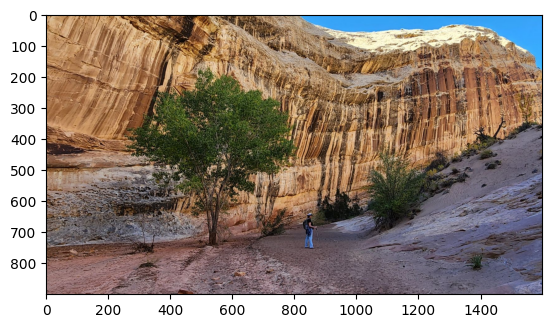

In [34]:
img = df_np.iloc[1]['images']
plt.imshow(img)

In [35]:
#s = rq.get(liste_img[12])
#bytes_io = BytesIO(s.content)
#image = Image.open(bytes_io)
#a = np.array(image)
#plt.imshow(a)

In [37]:
all_hashtags = []
for hashtags_list in dico.values():
    all_hashtags.extend(hashtags_list)

hashtags_series = pd.Series(all_hashtags)
hashtags_counts = hashtags_series.value_counts()

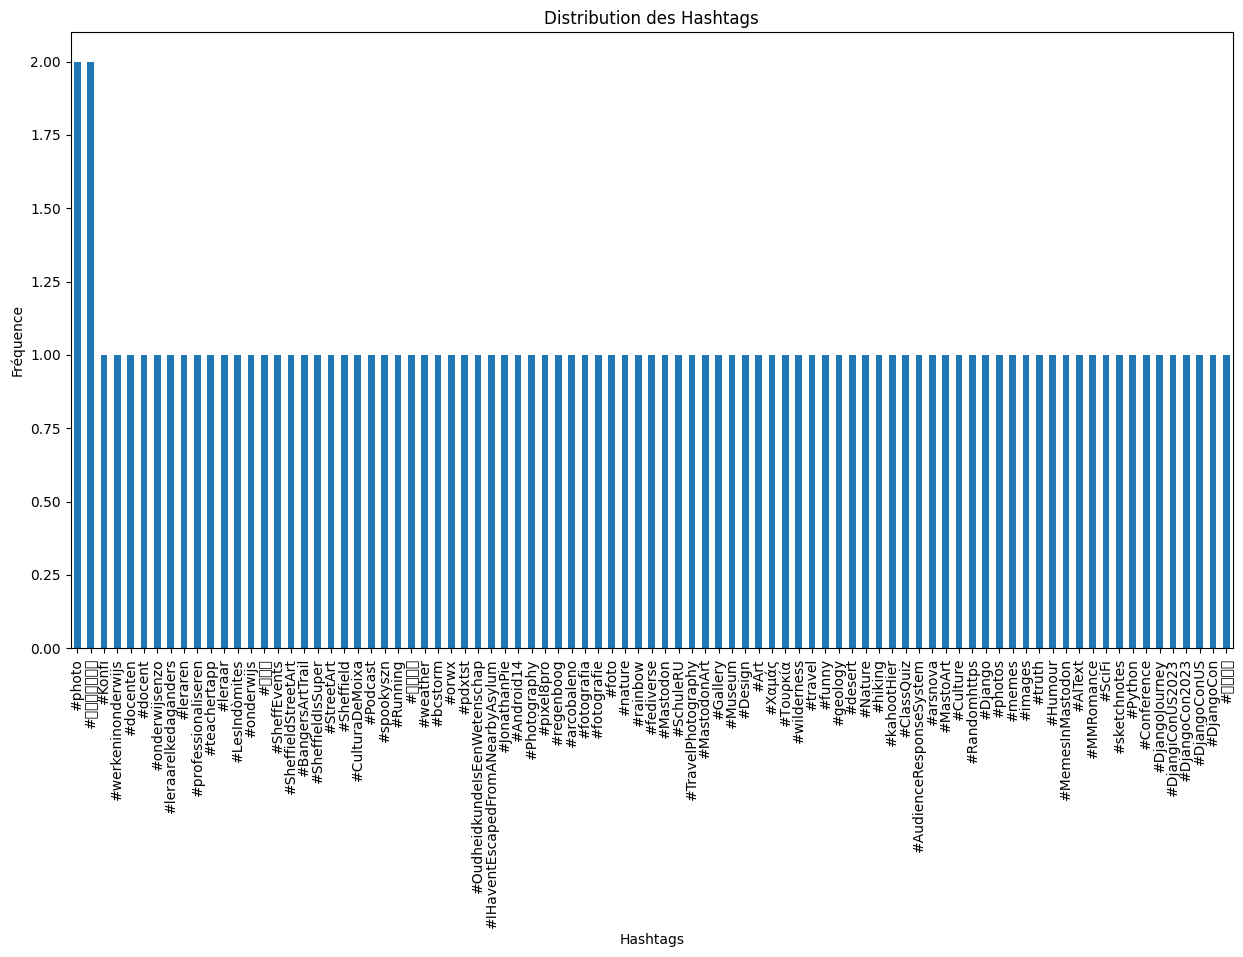

In [41]:
plt.figure(figsize=(15, 8))
hashtags_counts.plot(kind='bar')
plt.title('Distribution des Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Fréquence')
plt.show()

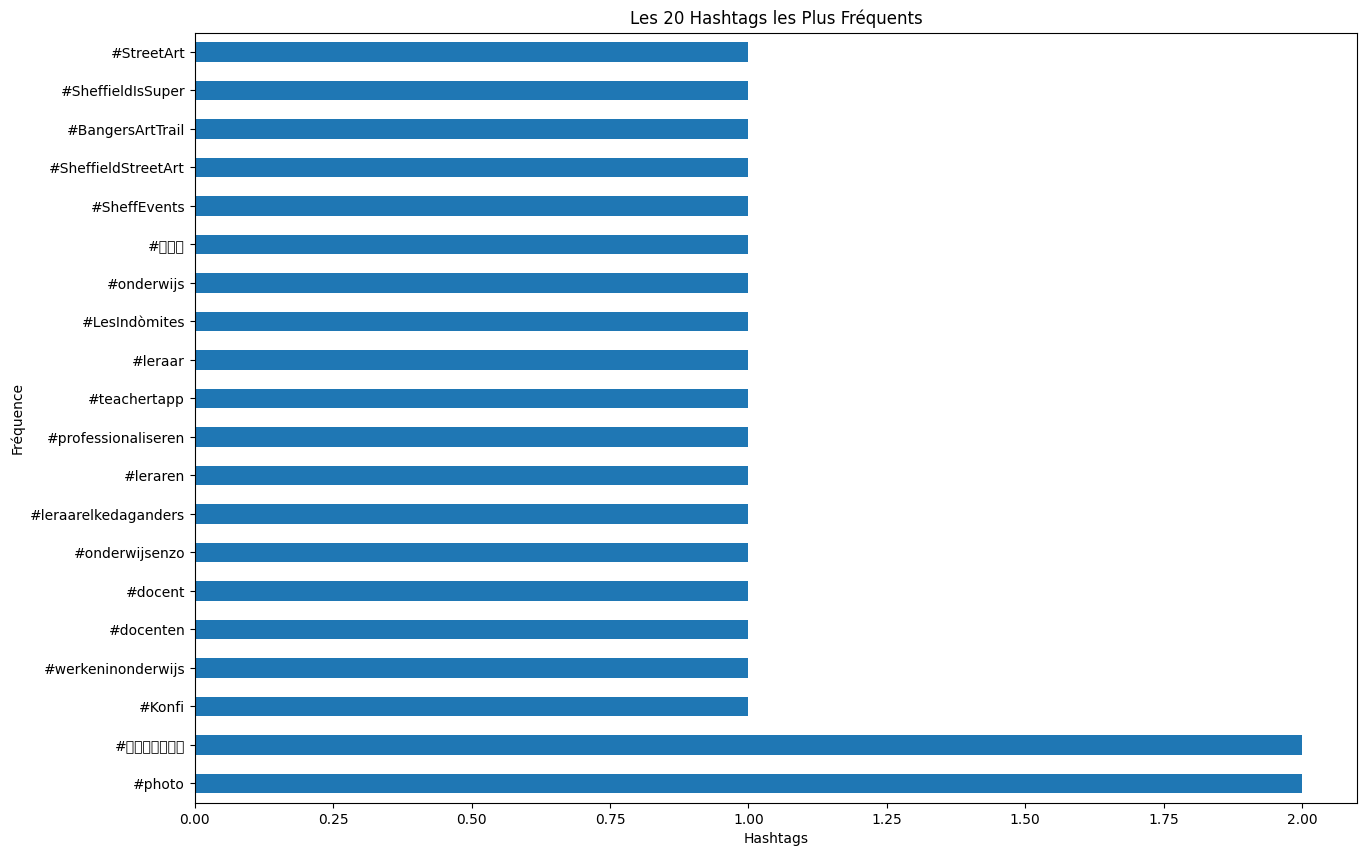

In [42]:
top_20_hashtags = hashtags_counts.nlargest(20)

plt.figure(figsize=(15,10))
top_20_hashtags.plot(kind='barh')
plt.title('Les 20 Hashtags les Plus Fréquents')
plt.xlabel('Hashtags')
plt.ylabel('Fréquence')
plt.show()

In [ ]:
#plt.figure(figsize=(15,20))
#df.value_counts().plot(kind='bar')
#plt.title('Distribution des Hashtags')
#plt.xlabel('Hashtags')
#plt.ylabel('Fréquence')
#plt.show()

In [ ]:
#top_20_hashtags = df.value_counts().nlargest(20)

#plt.figure(figsize=(15,10))
#top_20_hashtags.plot(kind='barh')
#plt.title('Les 20 Hashtags les Plus Fréquents')
#plt.xlabel('Hashtags')
#plt.ylabel('Fréquence')
#plt.show()